In [239]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [240]:
titanic = sns.load_dataset( "titanic" )
df = pd.DataFrame( titanic )

In [241]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [242]:
# Let's see how many people are survived based on gender

<AxesSubplot:xlabel='survived', ylabel='count'>

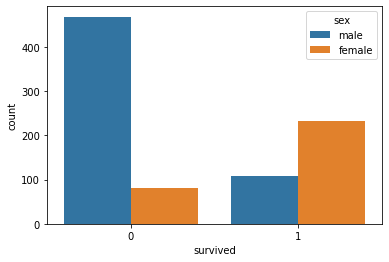

In [243]:
sns.countplot(x="survived",hue="sex",data=df)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [245]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [246]:
df.drop("deck",axis=1,inplace=True)
df.dropna(inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [247]:
sex = pd.get_dummies(df["sex"],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [248]:
embark=pd.get_dummies(df['embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [249]:
pclass=pd.get_dummies(df['pclass'],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [250]:
who = pd.get_dummies(df['who'],drop_first=True)
who.head()

,man,woman
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [251]:
adult_male = pd.get_dummies(df['adult_male'],drop_first=True)
adult_male.head()

,True
0,1
1,0
2,0
3,0
4,1


In [252]:
embark_town = pd.get_dummies(df["embark_town"],drop_first=True)
embark_town.head()

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [253]:
alone = pd.get_dummies(df["alone"],drop_first=True)
alone.head()

,True
0,0
1,0
2,1
3,0
4,1


In [254]:
Alive = pd.get_dummies(df["alive"],drop_first=True)
Alive.head()

,yes
0,0
1,1
2,1
3,1
4,0


In [255]:
df=pd.concat([df,sex,embark,pclass,who,adult_male,embark_town,alone,Alive],axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,S,2,3,man,woman,True,Queenstown,Southampton,True,yes
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,1,0,1,1,0,1,0,1,0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,0,0,0,0,1,0,0,0,0,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,1,0,1,0,1,0,0,1,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,1,0,0,0,1,0,0,1,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,1,0,1,1,0,1,0,1,1,0


In [256]:
df.drop(['sex',"embarked","who","adult_male","class","embark_town","alone","alive"],axis=1,inplace=True)
df.head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S,2,3,man,woman,True,Queenstown,Southampton,True,yes
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,1,0,0,1,1,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,1,1,0,1,0,1,1,0


In [257]:
x=df.drop("survived",axis=1)
y=df["survived"]

In [258]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Logistic Regression Classification Test Accuracy 1.0


c:\Users\sruth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\sruth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sruth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings

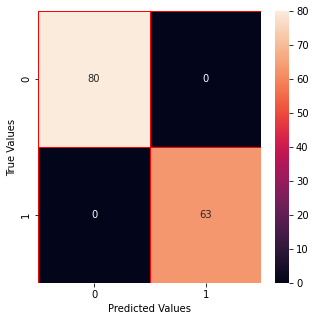

In [259]:
# Firstly, we start with Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Decision Tree Classification Score:  1.0


c:\Users\sruth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\sruth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\sruth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'int', 'str']. An error will be raised in 1.2.
  warnings.warn(


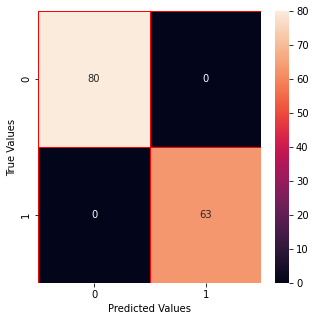

In [261]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))


#Confusion Matrix
y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

SVM Classification Score is: 0.6433566433566433


c:\Users\sruth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\sruth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\sruth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'int', 'str']. An error will be raised in 1.2.
  warnings.warn(


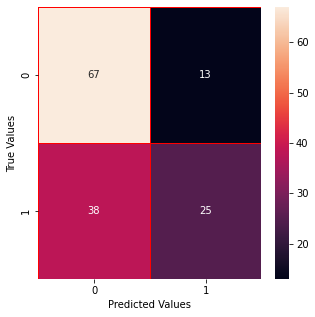

In [262]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))


#Confusion Matrix
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()